# HW1 - Data Exploration and Preparation

In [325]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [326]:
!rm *.csv
filename = "virus_data.csv"
dataset = pd.read_csv(filename)
dataset.shape

'rm' is not recognized as an internal or external command,
operable program or batch file.


(1250, 26)

# How to download from Colab?

In [327]:
outputPath = "saved_file.csv"
dataset.to_csv(outputPath)

In [328]:
# q2
dataset['num_of_siblings'].value_counts()

1    399
2    317
0    271
3    161
4     62
5     31
6      6
7      2
8      1
Name: num_of_siblings, dtype: int64

In [329]:
#q3
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             1250 non-null   int64  
 1   age                    1250 non-null   int64  
 2   sex                    1250 non-null   object 
 3   weight                 1250 non-null   float64
 4   blood_type             1250 non-null   object 
 5   current_location       1250 non-null   object 
 6   num_of_siblings        1250 non-null   int64  
 7   happiness_score        1250 non-null   int64  
 8   household_income       1250 non-null   float64
 9   conversations_per_day  1250 non-null   int64  
 10  sugar_levels           1250 non-null   int64  
 11  sport_activity         1250 non-null   int64  
 12  symptoms               930 non-null    object 
 13  pcr_date               1250 non-null   object 
 14  PCR_01                 1250 non-null   float64
 15  PCR_

In [330]:
#dataset.PCR_01.value_counts().plot(kind = 'barh')
#plt.show()
#dataset.PCR_01.describe()
dataset.head(1)


,patient_id,age,sex,weight,blood_type,current_location,num_of_siblings,happiness_score,household_income,conversations_per_day,...,PCR_03,PCR_04,PCR_05,PCR_06,PCR_07,PCR_08,PCR_09,PCR_10,spread,risk
0,312,7,F,24.7,A+,"('32.44874', '-99.73314')",2,8,312.3,3,...,159.851645,26.157901,5.694267,9.922768,0.792541,6.606938,2.093085,-36.6365,-1,-1


In [331]:
#q4
from sklearn.model_selection import train_test_split

random_state = (47 + 33)
test_size = 0.2

train, test = train_test_split(dataset, test_size=test_size, random_state=random_state)

print(train.shape, test.shape)

(1000, 26) (250, 26)


In [332]:
#q5
print("Correlation between 'spread' and 'PCR_01' is: {:.3f}".format(train.corr().spread.PCR_01))
print("Correlation between 'spread' and 'PCR_02' is: {:.3f}".format(train.corr().spread.PCR_02))
print("Correlation between 'spread' and 'PCR_09' is: {:.3f}".format(train.corr().spread.PCR_09))

Correlation between 'spread' and 'PCR_01' is: 0.104
Correlation between 'spread' and 'PCR_02' is: 0.525
Correlation between 'spread' and 'PCR_09' is: -0.047


C:\Users\shai8\AppData\Local\Temp\ipykernel_2124\108816960.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("Correlation between 'spread' and 'PCR_01' is: {:.3f}".format(train.corr().spread.PCR_01))
C:\Users\shai8\AppData\Local\Temp\ipykernel_2124\108816960.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("Correlation between 'spread' and 'PCR_02' is: {:.3f}".format(train.corr().spread.PCR_02))
C:\Users\shai8\AppData\Local\Temp\ipykernel_2124\108816960.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the val

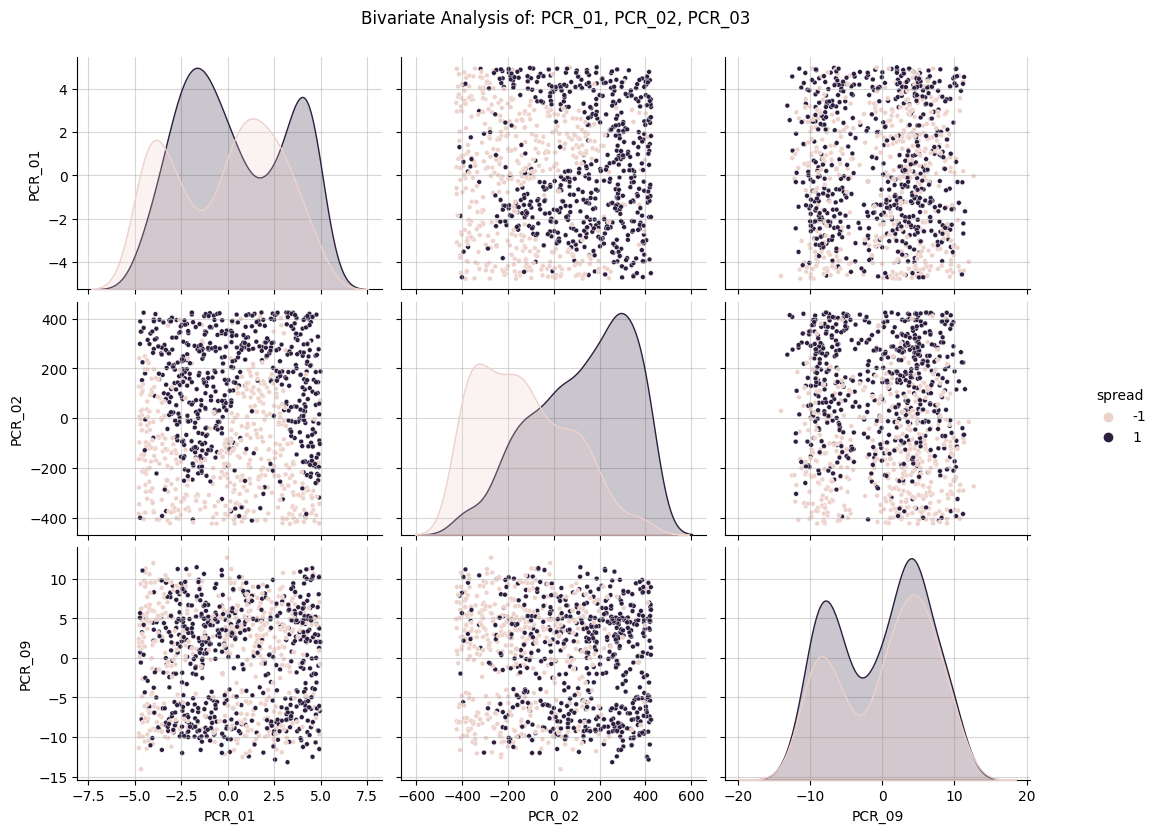

In [333]:
#q6
g=sns.pairplot(train[['PCR_01', 'PCR_02', 'PCR_09', 'spread']], plot_kws={"s": 12}, hue="spread")
g.fig.suptitle("Bivariate Analysis of: PCR_01, PCR_02, PCR_03", y=1.04)
for ax in np.ravel(g.axes):
  ax.grid(alpha=0.5)
g.fig.set_size_inches(12,8)

In [334]:
#KNN
from sklearn.base import BaseEstimator,ClassifierMixin
from scipy.spatial import distance
from scipy.stats import mode

class kNN(BaseEstimator, ClassifierMixin):
    def __init__(self, n_neighbors:int = 3):
        self.n_neighbors = n_neighbors
        self.x_train = None
        self.y_train = None

    def fit(self, X, y):
        self.x_train = np.copy(X)
        self.y_train = np.copy(y)
        return self

    def predict(self, X):
        dists = distance.cdist(X, self.x_train)
        kth_idx = np.argpartition(dists, self.n_neighbors)[:, :self.n_neighbors]
        predictions = mode(self.y_train[kth_idx], axis=1)[0].flatten()
        return predictions

In [335]:
def visualize_clf(clf, X, Y, title, 
                  xlabel, ylabel,
                  marker_size=50,
                  grid_length=300,
                  linewidths=None):
    import matplotlib.pyplot as plt
    import pandas as pd
    from matplotlib.colors import ListedColormap
    
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()
        
    # For internal use here, make sure labels are 0 and 1
    Y = np.ravel(Y).astype(int)
    labels = set(Y)
    assert len(labels) == 2, "Can only visualize two unique labels"

    if labels == set([-1,1]):
      Y = (Y + 1) // 2
      labels = set(Y)
    
    assert labels == set([0,1]), "Could not handle given labels"

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["D", "o"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(labels, palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size,
                    linewidths=linewidths)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()

C:\Users\shai8\AppData\Local\Temp\ipykernel_2124\1175346040.py:20: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  predictions = mode(self.y_train[kth_idx], axis=1)[0].flatten()


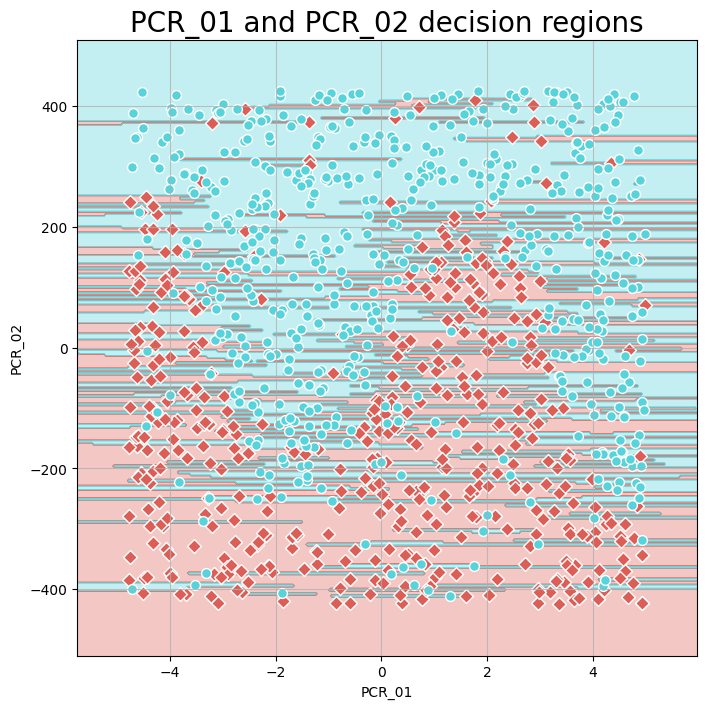

Training accuracy=1.0, Testing accuracy=0.716


C:\Users\shai8\AppData\Local\Temp\ipykernel_2124\1175346040.py:20: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  predictions = mode(self.y_train[kth_idx], axis=1)[0].flatten()


In [336]:
# knn usage to predict 'spread':
df_x_train = np.array(train[["PCR_01", "PCR_02"]])
df_y_train = np.array(train.spread)

df_x_test = np.array(test[["PCR_01", "PCR_02"]])
df_y_test = np.array(test.spread)

h = kNN(n_neighbors=1)
h.fit(df_x_train, df_y_train)

visualize_clf(h, df_x_train, df_y_train, "PCR_01 and PCR_02 decision regions", "PCR_01", "PCR_02")

train_acc = h.score(df_x_train, df_y_train)
test_acc = h.score(df_x_test, df_y_test)

print(f'Training accuracy={train_acc}, Testing accuracy={test_acc}')

C:\Users\shai8\AppData\Local\Temp\ipykernel_2124\1175346040.py:20: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  predictions = mode(self.y_train[kth_idx], axis=1)[0].flatten()


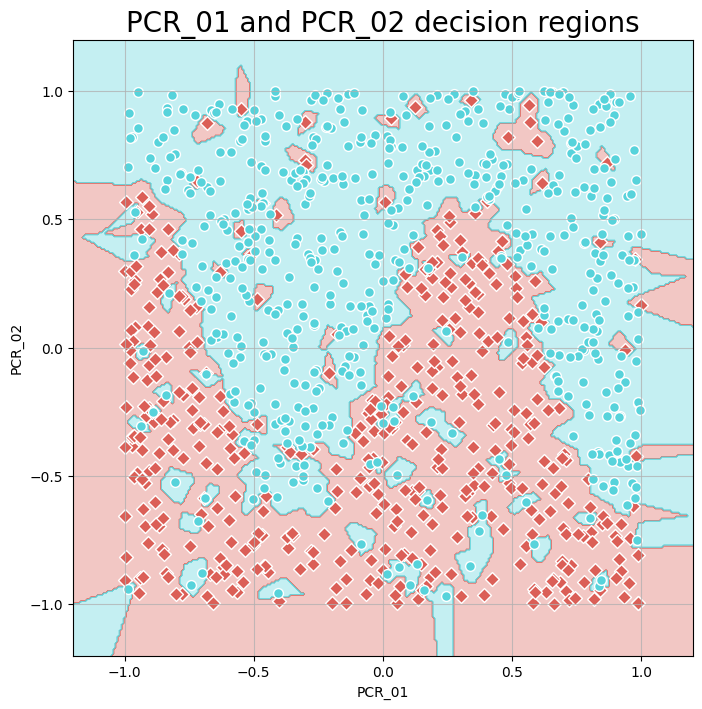

Training accuracy=1.0, Testing accuracy=0.756


C:\Users\shai8\AppData\Local\Temp\ipykernel_2124\1175346040.py:20: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  predictions = mode(self.y_train[kth_idx], axis=1)[0].flatten()


In [337]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
mm_x_train = scaler.fit_transform(df_x_train)
mm_x_test = scaler.fit_transform(df_x_test)

h = kNN(n_neighbors=1)
h.fit(mm_x_train, df_y_train)

visualize_clf(h, mm_x_train, df_y_train, "PCR_01 and PCR_02 decision regions", "PCR_01", "PCR_02")

train_acc = h.score(mm_x_train, df_y_train)
test_acc = h.score(mm_x_test, df_y_test)

print(f'Training accuracy={train_acc}, Testing accuracy={test_acc}')

C:\Users\shai8\AppData\Local\Temp\ipykernel_2124\1175346040.py:20: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  predictions = mode(self.y_train[kth_idx], axis=1)[0].flatten()


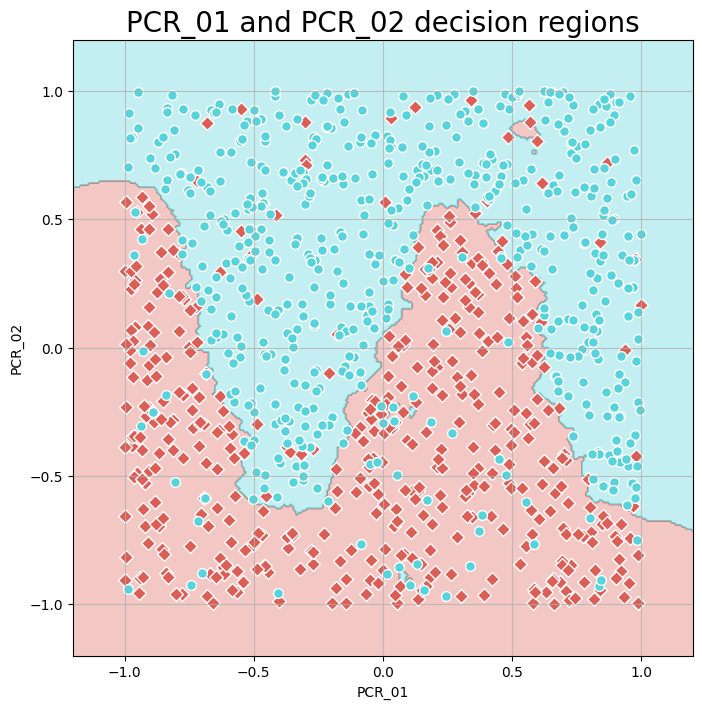

Training accuracy=0.892, Testing accuracy=0.828


C:\Users\shai8\AppData\Local\Temp\ipykernel_2124\1175346040.py:20: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  predictions = mode(self.y_train[kth_idx], axis=1)[0].flatten()


In [338]:
h = kNN(n_neighbors=7)
h.fit(mm_x_train, df_y_train)

visualize_clf(h, mm_x_train, df_y_train, "PCR_01 and PCR_02 decision regions", "PCR_01", "PCR_02")

train_acc = h.score(mm_x_train, df_y_train)
test_acc = h.score(mm_x_test, df_y_test)

print(f'Training accuracy={train_acc}, Testing accuracy={test_acc}')

<AxesSubplot: title={'center': 'patients at risk by blood type'}, xlabel='patients blood type', ylabel='number of patients'>

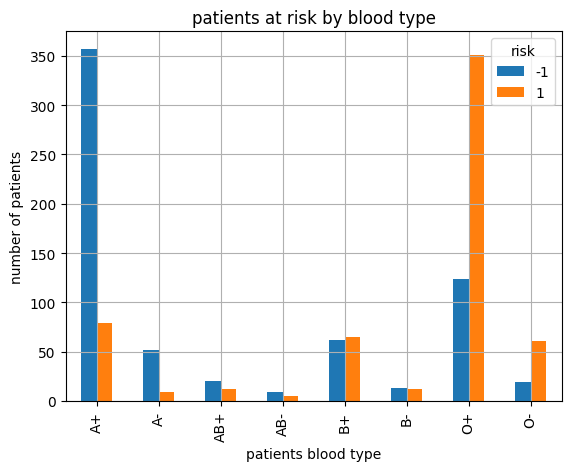

In [339]:
pd.crosstab(dataset['blood_type'], dataset['risk']).plot(kind='bar', title='patients at risk by blood type', xlabel='patients blood type', ylabel='number of patients', grid=True)

In [340]:
# Groups we seperate by
blood_groups = {'A': ['A+', 'A-'], 'O': ['O-', 'O+'], 'B/AB': ['B+', 'B-', 'AB+', 'AB-']}

for type, blood_group in blood_groups.items():
    # Creating the mew features
    feature = dataset["blood_type"].isin(blood_group).astype(int)
    # Inserting the new features
    dataset['blood_group_' + type] = feature

# Drop the old blood_type feature
dataset.drop('blood_type', inplace=True ,axis=1)

In [341]:
# Q_13
symptoms_per_patient = [x.split(';') for x in dataset["symptoms"] if x is not np.nan]
symptoms = list({x for l in symptoms_per_patient for x in l})

for symptom in symptoms:
    feature = []
    for sample in dataset["symptoms"]:
        if sample is np.nan or symptom not in sample:
            feature.append(0)
        else:
            feature.append(1)

    dataset['symptom_' + symptom] = feature

# Drop the old symptoms feature   
dataset.drop('symptoms', inplace=True ,axis=1)

In [342]:
# transforming 'sex' feature to numeric:
dataset.replace(to_replace={'sex': {'F': 1, 'M': -1}}, inplace=True)

# transforming 'current_location' to two continuous features:
dataset['x_global_coor'] = [float(x.split("'")[1]) for x in dataset['current_location']]
dataset['y_global_coor'] = [float(x.split("'")[3]) for x in dataset['current_location']]
# Drop the old 'current_location' feature   
dataset.drop('current_location', inplace=True ,axis=1)

# transform 'pcr_date' to numeric:
import datetime
dataset['pcr_date_numeric'] = [int(datetime.datetime.strptime(x, '%Y-%m-%d').timestamp()) for x in dataset['pcr_date']]
# Drop the old 'pcr_date' feature   
dataset.drop('pcr_date', inplace=True ,axis=1)


,patient_id,age,sex,weight,num_of_siblings,happiness_score,household_income,conversations_per_day,sugar_levels,sport_activity,...,blood_group_O,blood_group_B/AB,symptom_cough,symptom_low_appetite,symptom_shortness_of_breath,symptom_fever,symptom_sore_throat,x_global_coor,y_global_coor,pcr_date_numeric
0,312,7,1,24.7,2,8,312.3,3,79,1,...,0,0,0,1,0,0,1,32.44874,-99.73314,1593810000
1,787,21,-1,86.3,4,6,641.5,1,84,2,...,1,0,0,1,0,0,0,38.07789,13.44275,1591995600
2,1150,28,-1,98.9,1,9,864.2,9,113,0,...,1,0,0,0,0,0,0,38.07789,13.44275,1590786000
3,947,20,1,55.9,3,8,428.3,3,95,3,...,1,0,0,0,0,0,0,51.40148,-1.32471,1600549200
4,889,44,-1,47.2,3,7,371.1,1,43,3,...,1,0,0,0,0,0,1,44.27804,-88.27205,1596142800
